
Random Forest Accuracy: 0.8800
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.88      0.91      0.89        55

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100

[[38  7]
 [ 5 50]]

Logistic Regression Accuracy: 0.7700
              precision    recall  f1-score   support

           0       0.70      0.87      0.77        45
           1       0.86      0.69      0.77        55

    accuracy                           0.77       100
   macro avg       0.78      0.78      0.77       100
weighted avg       0.79      0.77      0.77       100

[[39  6]
 [17 38]]

Gradient Boosting Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        45
           1       0.86      0.87      0.86        55

    accuracy                          

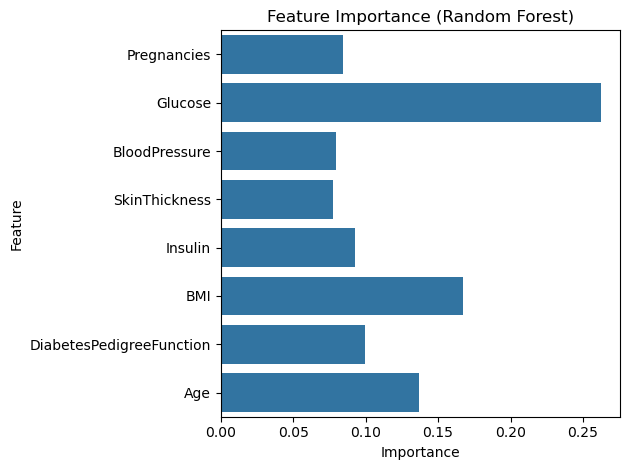

In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("diabetes.csv")  

# Split features and target
X = df.drop('Outcome', axis=1) #Load the dataset
df = pd.read_csv("diabetes.csv")  

# Replace 0s with NaN in relevant columns and fill with median
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
# Load the dataset
df = pd.read_csv("diabetes.csv")  

# Replace 0s with NaN in relevant columns and fill with median
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fix:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

# Split features and target))

# Split features and target
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=10)

# Define model
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    results[name] = acc

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', models['Random Forest']),
        ('lr', models['Logistic Regression']),
        ('gb', models['Gradient Boosting']),
        ('xgb', models['XGBoost'])
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, voting_pred)

print("\nVoting Classifier Accuracy:", voting_acc)
print(classification_report(y_test, voting_pred))
print(confusion_matrix(y_test, voting_pred))
results['Voting Classifier'] = voting_acc

# Summary Table
summary_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\nModel Performance Summary:")
print(summary_df.sort_values(by="Accuracy", ascending=False))

# Plot feature importance from Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = df.columns[:-1]
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ✅ Function to validate input
def get_valid_input(prompt, min_val, max_val, is_float=False):
    while True:
        try:
            value = float(input(prompt)) if is_float else int(input(prompt))
            if min_val <= value <= max_val:
                return value
            else:
                print(f"❗ Value must be between {min_val} and {max_val}.")
        except ValueError:
            print("❗ Invalid input. Please enter a valid number.")

# ✅ Function to make prediction and classify risk
def predict_diabetes(data_dict):
    keys = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DPF", "Age"]
    data = [data_dict[k] for k in keys]
    scaled = scaler.transform([data])
    pred = model.predict(scaled)[0]
    prob = model.predict_proba(scaled)[0][1]  # Probability of being diabetic

    # Risk classification
    if prob >= 0.80:
        risk = "High Risk"
    elif prob >= 0.50:
        risk = "Medium Risk"
    else:
        risk = "Low Risk"

    if pred == 1:
        return f"✅ Diabetic (Risk Level: {risk}) – Please consult a doctor."
    else:
        return f"❌ Non-Diabetic (Risk Level: {risk}) – Maintain a healthy lifestyle."

# ✅ Collect input from user with limits
user_data = {
    "Pregnancies": get_valid_input("Enter number of Pregnancies (0–10): ", 0, 10),
    "Glucose": get_valid_input("Enter Glucose Level (50–300): ", 50, 300),
    "BloodPressure": get_valid_input("Enter Blood Pressure (40–150): ", 40, 150),
    "SkinThickness": get_valid_input("Enter Skin Thickness (0–100): ", 0, 100),
    "Insulin": get_valid_input("Enter Insulin Level (0–900): ", 0, 900),
    "BMI": get_valid_input("Enter BMI (10–70): ", 10, 70, is_float=True),
    "DPF": get_valid_input("Enter DPF (0.0–2.5): ", 0.0, 2.5, is_float=True),
    "Age": get_valid_input("Enter Age (10–100): ", 10, 100)
}

# ✅ Predict and print result
result = predict_diabetes(user_data)
print("\nResult:", result)
